In [19]:
import numpy as np
import matplotlib.pyplot as plt
import map as mp
import ctrl
import path_planner
from task_allocation import hungarian
import time as TM


n_starts = 4
n_tasks = 4
map = mp.Map(10, n_starts, n_tasks, 100, 100, 1, 1)
map.setObstacleRandn(2026)
# map.plot()
# map.plotGrid()
astar_planner = path_planner.AStarPlanner(map.grid_map, map.resolution_x, map.resolution_y)
starts = map.starts_grid
tasks = map.tasks_grid

# calculate the distance matrix
dist_matrix = np.zeros((n_starts, n_tasks))
path_matrix = []
# for i in range(n_starts):
#     for j in range(n_tasks):
i=0
j=0
astar_planner.resetNodes()
#path is index of grid nodes
path, dist_matrix[i, j] = astar_planner.plan(starts[i], tasks[j])
x = [((p[0] + 0.5)*map.resolution_x, (p[1]+0.5)*map.resolution_y) for p in path]
path = x

[(49.5, 63.5),
 (50.5, 62.5),
 (51.5, 61.5),
 (52.5, 60.5),
 (53.5, 59.5),
 (54.5, 58.5),
 (55.5, 57.5),
 (56.5, 56.5),
 (57.5, 55.5),
 (58.5, 54.5),
 (59.5, 53.5),
 (60.5, 52.5),
 (61.5, 51.5),
 (62.5, 50.5),
 (63.5, 49.5),
 (63.5, 48.5),
 (63.5, 47.5),
 (63.5, 46.5),
 (63.5, 45.5),
 (63.5, 44.5),
 (63.5, 43.5),
 (63.5, 42.5),
 (63.5, 41.5),
 (63.5, 40.5),
 (63.5, 39.5),
 (63.5, 38.5),
 (63.5, 37.5),
 (63.5, 36.5),
 (64.5, 35.5),
 (65.5, 34.5),
 (66.5, 33.5),
 (67.5, 32.5),
 (68.5, 31.5),
 (69.5, 30.5),
 (70.5, 29.5),
 (71.5, 28.5),
 (72.5, 27.5),
 (73.5, 26.5),
 (74.5, 25.5),
 (75.5, 24.5),
 (76.5, 23.5),
 (77.5, 22.5),
 (78.5, 21.5),
 (79.5, 20.5),
 (80.5, 19.5),
 (80.5, 18.5),
 (81.5, 17.5),
 (81.5, 16.5),
 (82.5, 15.5),
 (82.5, 14.5),
 (83.5, 13.5),
 (83.5, 12.5),
 (83.5, 11.5),
 (84.5, 10.5),
 (84.5, 9.5),
 (85.5, 8.5),
 (85.5, 7.5),
 (86.5, 6.5),
 (86.5, 5.5),
 (87.5, 4.5),
 (87.5, 3.5),
 (88.5, 2.5),
 (88.5, 1.5)]

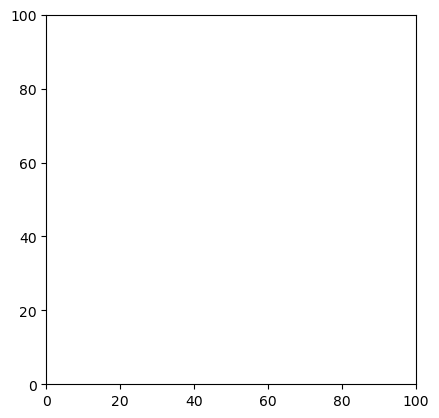

In [28]:
grid = np.zeros((100,100))
fig, ax = plt.subplots()
ax.set_xlim(0, map.n_x)
ax.set_ylim(0, map.n_y)
img = 255-grid
img = img.transpose()
# img[0,0] = 200
ax.imshow(img, cmap='gray',vmin=0, vmax=255)

In [29]:
import csv

# 假设 path_allot 是一个包含路径点的列表
# 每个路径点是一个元组，例如：[(x1, y1), (x2, y2), ...]
path_allot = [
    [(0, 1), (1, 2), (2, 3)],
    [(3, 4), (4, 5), (5, 6)],
    [(6, 7), (7, 8), (8, 9)]
]

# 打开一个CSV文件进行写入
with open('path_allot.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 写入CSV文件的表头
    csvwriter.writerow(['Time Point', 'Path Points'])
    
    # 遍历每个时间点和对应的路径点
    for i, path in enumerate(path_allot):
        # 将路径点转换为字符串
        path_str = '; '.join([f'({x}, {y})' for x, y in path])
        
        # 写入时间点和路径点到CSV文件
        csvwriter.writerow([i, path_str])

print("Path points have been saved to path_allot.csv")

Path points have been saved to path_allot.csv


In [30]:
import csv

# 假设 path_allot 是一个包含路径点的列表
# 每个路径点是一个元组，例如：[(x1, y1), (x2, y2), ...]
path_allot = [
    [(0, 1), (1, 2), (2, 3)],
    [(3, 4), (4, 5)],
    [(6, 7), (7, 8), (8, 9), (9, 10)]
]

# 找到最长的路径长度
max_length = max(len(path) for path in path_allot)

# 打开一个CSV文件进行写入
with open('path_allot.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 写入CSV文件的表头
    header = ['Time Point'] + [f'Path Point {i+1}' for i in range(max_length)]
    csvwriter.writerow(header)
    
    # 遍历每个时间点和对应的路径点
    for i, path in enumerate(path_allot):
        # 将路径点转换为字符串，并填充空值
        row = [i] + [f'({x}, {y})' for x, y in path] + [''] * (max_length - len(path))
        
        # 写入时间点和路径点到CSV文件
        csvwriter.writerow(row)

print("Path points have been saved to path_allot.csv")

Path points have been saved to path_allot.csv


In [2]:
import time

# 获取当前时间，精确到分钟
current_time = time.localtime()
formatted_time = time.strftime("%Y-%m-%d %H:%M", current_time)

print(formatted_time)

2024-10-04 22:35


In [6]:
path = [[1,2,3],[4,5,6],[7,8,9],[]]
path_num = [len(p) for p in path]
path_num

[3, 3, 3, 0]

In [7]:
from math import *
import numpy as np

def forward(state, u, dt):
    state[0] += u[0] * dt * cos(state[2])
    state[1] += u[0] * dt * sin(state[2])
    state[2] += u[1] * dt
    state[3] = u[0]
    state[4] = u[1]
    return state

state0 = np.zeros(5)
u = [1, 1]
dt = 1
state1 = state0.copy()  # 使用 numpy 的 copy 方法
state = forward(state1, u, dt)
print(state)
print(state0)

[1. 0. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [4]:
import numpy as np

test = np.zeros((3, 3))
target = np.zeros((3, 3))
def test_func(data,t):
    t = data
    data[0, 0] = 1
    temp = data[0,1]
    temp = 2
    return data, temp
test_, temp_ = test_func(test,target)
print(test_)
print(temp_)
print(test)
print(target)

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
2
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [2]:
testlist = [1,2,3,4,5]
testlist.pop(3)
print(testlist)

[1, 2, 3, 5]


In [ ]:
import numpy as np

test = np.random.rand(3, 2)
print(test)
min_test = np.min(test, axis=0)
print(min_test)